In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<Axes: ylabel='actions'>

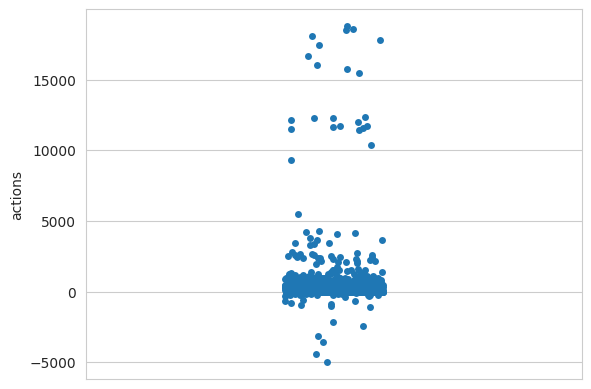

In [10]:
# Setup data
data = pd.read_csv(f"../generated/benchmark.csv", sep=',')
data = data.groupby(['directory', 'type']).agg({'duration': 'median', 'actions': 'first', 'added': 'first', 'deleted': 'first', 'updated': 'first', 'moved-unchanged': 'first', 'moved-updated': 'first', 'lines-left': 'first', 'lines-right': 'first', 'similar-groups': 'first'}).reset_index()
data['moved'] = data["moved-unchanged"] + data['moved-updated']

seed = data[data['type'] == 'SEED']['actions'].to_list()
seed_even = data[data['type'] == 'SEED-EVEN']['actions'].to_list()
lcs = data[data['type'] == 'LCS']['actions'].to_list()
diff = [a - b for a, b in zip(lcs, seed)]
diff2 = [a - b for a, b in zip(lcs, seed_even)]
df = pd.DataFrame(data=diff, columns=['actions'])
df2 = pd.DataFrame(data=diff2, columns=['actions'])
sns.stripplot(data=df, y='actions')
sns.stripplot(data=df2, y='actions')
# positive = seed is better (because lcs-seed)
# negative = lcs is better (because lcs-seed)